


**1º Lista de Exercícios SAA 0184 - 2020**



Nome: Alessandro Melo de Oliveira

Nº USP: 10788662



---









**Questão 1**




**a)** Como a pressão em um ponto P qualquer é causada pelo peso da massa de ar acima deste ponto, uma boa aproximação para a massa contida na troposfera é calcular a massa como sendo $M = M_0 - M_{11}$, onde $M_0$ é a massa de ar acima do nível do mar (sea level), e $M_{11}$ é a massa de ar no limite da tropopausa.
   
   
   \begin{equation*}
   \begin{gathered}
   M = M_0 - M_{11} = \frac{P_0 A_0}{g} - \frac{P_{11} A_{11}}{g} \\
   M = \frac{10132 \cdot 4 \pi \cdot (6371 \cdot 10^3)^2}{9.81} - \frac{22620.47 \cdot 4 \pi \cdot (6382 \cdot 10^3)^2}{9.81} \\
   M = 5.26 \cdot 10^{18} - 1.18 \cdot 10^{18} = \boxed{4.08 \cdot 10^{18} kg}
   \end{gathered}
   \end{equation*}
   
 
**b)**Tendo o valor calculado de massa total, a a massa correspondente à metade é:
    
  \begin{equation*}
        M_x = 5.26 \cdot 10^{18} - 4.08 \cdot 10^{18} = 3.22 \cdot 10^{18} \ \text{kg}
    \end{equation*}
    
onde $M_x$ pode ser aberto como:
  \begin{equation} 
        M_x = 3.22 \cdot 10^{18} = \frac{P_x A_x}{g} 
  \end{equation}
    
Como a pessão $P_x$ para uma dada altura $h_x$ qualquer é dada pela relação:
    
  \begin{equation*}
        P_x = P_0 \left(1- \frac{0.0065 h_x}{288.15} \right)^{5.25}
  \end{equation*}
é possível substituir esse valor, juntamente com a área relativa a $h_x$, na equação do $M_x$ e isolar $h_x$:
    
  \begin{equation*}
        \begin{gathered}
        3.22 \cdot 10^{18} \cdot 9.81 = P_0 \left(1 - \frac{0.0065 h_x}{288.15} \right ) \cdot 4\pi \left(6371 \cdot 10^3 + h_x \right )^2 \\ \\
        \therefore \boxed{h_x \approx 3977.84 \ \text{m} }
        \end{gathered}
    \end{equation*}
    


**Questão 2**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns                               ## Bibliotecas usadas
from sympy.solvers import solve
from sympy import Symbol

Os seguintes parâmetros foram usados como dados de entrada para o desenvolvimento da questão
inteira:

In [2]:
nt=0.92 #relação de pressões dinâmicas
st=6.48 #área empenagem
sw=27.3 #área asa
b=16.25 #evergadura
arw=9.67 
art=5.25 
lambdaw=0.4 #afilamento asa
lambdat=0.6 #afilamento empenagem
delta_c4=0
aw=4.9 # rad
at=4.9 # rad
iw=1*(3.14/180) #incidência asa
alphaLow=-2*(3.14/180)
alphaLot=0
xw=0.407
zw=0
xt=6.71
zt=2.68
Cmw=-0.02 
Cmt=0

Cmdelta=-0.0071 #graus
Cldelta=0.015 #graus



Enquanto os seguintes dados foram deduzidos de imediato:


In [3]:
ss = st/sw #razão entre áreas

cr=(sw*2)/(b*(1+lambdaw)) #corda raiz
ct=lambdaw*cr #corda ponta
cbarra = (2/3)*cr*((1+lambdaw+lambdaw**2)/(1+lambdaw)) #mac

kh = (1-abs((zt-zw)/b))/(2*(xt-xw)/b)**(1/3)
kdelta=(10-3*lambdaw)/7                      ##usados para calcular dev
kar=1/arw-1/(1+arw**1.7)

clow = -aw*alphaLow
clot = -at*alphaLot

dev=4.44*(kh*kdelta*kar)**1.19 ## dev = (1-dE/dAlpha)
E0 = -dev*(alphaLow-iw) ##epislion 0

cl_alpha = aw+nt*ss*at*(1-dev) 
dcmf_dal=0.25*cl_alpha


**2.a)**

In [4]:
xn = (aw*xw+at*(1-dev)*ss*nt*xt-dcmf_dal*cbarra)/cl_alpha 
print(f'Xn: {round(xn,5)} [m]');

Xn: 0.82989 [m]


**2.b)**

In [5]:
it_b =2*(3.14/180) #valor dado
alpha_b = 5*(3.14/180) #valor dado
E_b = E0 + dev*alpha_b

Clo_b = clow+aw*iw+nt*ss*clot+nt*ss*at*(it_b-E0)
Cl_b = Clo_b+cl_alpha*alpha_b

print(f'CL: {round(Cl_b,5)}');


CL: 0.77446


**2.c)**

In [6]:
cmfus_b = -0.015+0.25*Cl_b
xcp = ((clow+aw*(alpha_b+iw))*xw+(clot+at*(alpha_b+it_b-E_b))*ss*nt*xt-(Cmw+cmfus_b)*cbarra)/Cl_b

print(f'Xcp: {round(xcp,5)} [m]');

Xcp: 0.77949 [m]


**2.d)**

In [7]:
xcg = (-0.25+0.33)*cbarra+xw
vh = ((xt-xcg)*ss)/cbarra #volume de causa
cm_alpha = aw*(xcg-xw)/cbarra - at*(1-dev)*vh*nt
ms = -(xcg-xn)/cbarra

print(f'MS: {round(ms,5)}')

MS: 0.1572


**2.e)**

Nessa questão em específico, assim como na **3.a)**, eu optei por resolver o sistema de equações
na “força bruta”, criando um vetor de alphas, encontrando vários its e calculando vários cmgcg’s.
Com todos esses dados, selecionei a combinação de alpha e it que fornecia o valor absoluto de cmcg
mais próximo de 0, indicando a trimabilidade.

In [8]:
cl_trim = 0.43 #valor dado

data = pd.DataFrame(index=np.arange(0,1500), 
                    columns=['alpha','it','cmcg']) ##dataframe onde será colocado o trio alpha,it e cmcg

d_alpha = np.linspace(-7,7,1500) 
r_alpha = 0.01745*d_alpha 
loc=np.arange(0,1500) 

for ialpha,iloc in zip(r_alpha,loc):
   
    itt = (cl_trim-clow-aw*iw-nt*ss*clot+nt*ss*at*E0-cl_alpha*ialpha)/(nt*ss*at) #isolado da equação geral de CL
    
    Clo_fus= clow+aw*iw+nt*ss*clot+nt*ss*at*(itt-E0)
    Cl_fus = Clo_fus+cl_alpha*ialpha   
    Cm_fus = -0.015 + 0.25*Cl_fus
    
    
    cmcg = ((clow+aw*iw)*(xcg-xw))/cbarra-(clot+
           at*(itt-E0))*vh*nt+cm_alpha*ialpha + Cmw + Cm_fus 
    
    row = {'alpha': ialpha, 'it': itt, 'cmcg':cmcg} 
    data.iloc[iloc] = row 
    
ind = data['cmcg'].sub(0).abs().values.argmin() #index do dataframe onde ocorre cmcg=0
linha= data.loc[[ind]]

it_trim = float(data.iloc[[ind],1]) 
it_degree = 57.2958*it_trim

print(f'it_trim: {round(it_degree,6)} [º]');


it_trim: 1.195216 [º]


**2.f)**

O gráfico foi gerado usando o it de trimagem encontrado acima no item **2.e)**, onde o ponto
marcado indica a condição de trimabilidade, que ocorre em (1.67, 0).


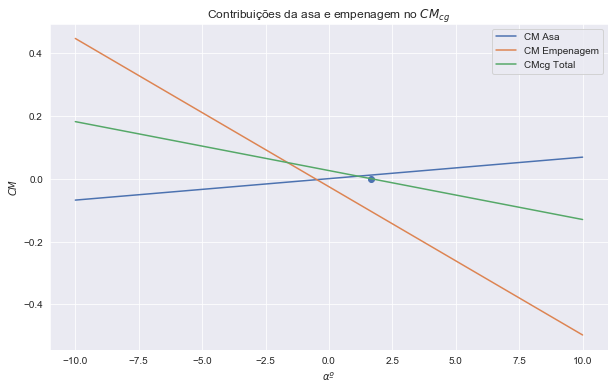

In [9]:
alpha_deg = np.linspace(-10,10,1000)
alpha_rad= alpha_deg*0.01745

cm_asa=[]
cm_emp=[]
cm_fus=[]

for al in alpha_rad:
   
    cmasa =((clow+aw*iw+aw*al)*(xcg-xw))/cbarra + Cmw ## contribuição da asa
    cm_asa.append(cmasa)

    cmemp = -(clot+at*(al+it_trim-E0-dev*al))*vh*nt ## contribuição da empenagem
    cm_emp.append(cmemp)
    
    cl_fus= clow+aw*iw+nt*ss*clot+nt*ss*at*(it_trim-E0) + cl_alpha*al
    cm_fuse = -0.015 + 0.25*(cl_fus) ## contribuição da fuselagem
    cm_fus.append(cm_fuse)
      
cm_total=[x+y+z for x,y,z in zip(cm_asa,cm_emp,cm_fus)]

fig=plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.set_palette("deep")
plt.plot(alpha_deg,cm_asa,label='CM Asa')
plt.scatter(1.67436,0) #corresponde ao ponto de trimagem
plt.plot(alpha_deg,cm_emp,label='CM Empenagem')
plt.plot(alpha_deg,cm_total,label='CMcg Total')
plt.legend(loc='best')
plt.xlabel("$\\alpha º$")
plt.ylabel("$CM$")
plt.title('Contribuições da asa e empenagem no $CM_{cg}$')
plt.grid(True)

Apesar de estar plotado somente as curvas da empenagem e da asa, também é somado a contribuição
da fuselagem na reta do $CM_{cg}$ total.

In [10]:
print('----------------#RESULTADOS QUESTÃO 2--------------')
print(f'a) Xn: {round(xn,5)} [m]');
print(f'b) CL: {round(Cl_b,5)}');
print(f'c) Xcp: {round(xcp,5)} [m]');
print(f'd) MS: {round(ms,5)}')
print(f'e) it_trim: {round(it_degree,6)} [º]');

----------------#RESULTADOS QUESTÃO 2--------------
a) Xn: 0.82989 [m]
b) CL: 0.77446
c) Xcp: 0.77949 [m]
d) MS: 0.1572
e) it_trim: 1.195216 [º]


**Exercício 3**

**3.a)**

In [11]:
CL_trim= 0.6 #valor dado
it3 = 0 #valor dado

data3 = pd.DataFrame(index=np.arange(0,1500), 
                     columns=['alpha','delta_e','cmcg']) ##dataframe onde será colocado o trio alpha,delta_e e cmcg

for ialpha,iloc in zip(r_alpha,loc):
    
    delta_e= (CL_trim-clow-aw*iw-nt*ss*clot-nt*ss*at*(it3-E0)-cl_alpha*ialpha)/(Cldelta) #isolado da equação de CL
         
    Cm_fus3 = -0.015 + 0.25*CL_trim
    
    cmcg_e = ((clow+aw*iw)*(xcg-xw))/cbarra - (clot+at*(it3-E0))*vh*nt + (Cmw + 
                 Cm_fus3 + cm_alpha*ialpha + Cmdelta*delta_e)
    
    row3 = {'alpha': ialpha, 'delta_e': delta_e, 'cmcg':cmcg_e}
    data3.iloc[iloc] = row3
    
ind3 = data3['cmcg'].sub(0).abs().values.argmin()
linha3= data3.loc[[ind3]]
deltae_trim = float(data3.iloc[[ind3],1])

print(f'delta_trim: {round(deltae_trim,5)} [º]');

delta_trim: 41.71949 [º]


**3.b)**


A margem estática é a mesma encontrada no item **2.d)**, uma vez que, somados os momentos
das superfícies na equação geral, tais contribuições irão a 0 quando se deriva a equação do momento
em relação ao CL para encontrar o ponto neutro. Ou seja, o Xcn não muda, e como não foi indicado
variação no Xcg, a margem estática permanece igual a **0.1572**, indicando estabilidade.


**3.c)**

Os limites para $\delta_e$ foram definidos como -25 e +25.




In [12]:
cltrim_e=1.7 #valor dado

xcg_list=[]
for delta_e in np.arange(-25,25,0.5): ## mínima e máxima deflexão
    alpha_e = (cltrim_e-clow-aw*iw-nt*ss*clot-ss*at*(0-E0)-Cldelta*delta_e)/cl_alpha
    cmfus_e = -0.015+0.25*cltrim_e
    Ee = E0 + dev*alpha_e
    xcgg = Symbol('xcgg')

    cmcg = (clow+aw*(iw+alpha_e))*(xcgg-xw)/cbarra+(Cmw+cmfus_e-(clot+at*(alpha_e-Ee))*(xt-
                   xcgg)*ss*nt/cbarra + Cmdelta*delta_e)

    xcg_list.append(solve(cmcg,xcgg))
    
xcg_min = min(xcg_list)
xcg_min=xcg_min[0]

print(f'Passeio CG: {round(xcg_min,5)}  < xcg < {round(xn,5)} [m]');

Passeio CG: 0.64175  < xcg < 0.82989 [m]


In [13]:
print('----------------#RESULTADOS QUESTÃO 3--------------')    
print(f'a) delta_trim: {round(deltae_trim,5)} [º]');
if ms>=0:
  print(f'b) MS: {round(ms,5)}, indicando estabilidade.')
else:
  print(f'b) MS: {round(ms,5)}, indicando instabilidade.')
print(f'c) Passeio CG: {round(xcg_min,5)}  < xcg < {round(xn,5)} [m]');

----------------#RESULTADOS QUESTÃO 3--------------
a) delta_trim: 41.71949 [º]
b) MS: 0.1572, indicando estabilidade.
c) Passeio CG: 0.64175  < xcg < 0.82989 [m]
